In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [2]:
y_train = pd.read_parquet('y_train.parquet')
X_train = pd.read_parquet('X_train.parquet')
X_test = pd.read_parquet('X_test.parquet')
test_intervals = pd.read_excel('test_intervals.xlsx')
messages = pd.read_excel('messages.xlsx')

In [3]:
print("Пропущенные значения в X_train:")
print(X_train.isnull().sum())
print("Пропущенные значения в y_train:")
print(y_train.isnull().sum())
print("Пропущенные значения в X_test:")
print(X_test.isnull().sum())

Пропущенные значения в X_train:
ЭКСГАУСТЕР 4. ТОК РОТОРА 1                          832168
ЭКСГАУСТЕР 4. ТОК РОТОРА2                           838165
ЭКСГАУСТЕР 4. ТОК СТАТОРА                           470482
ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ              699514
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1    2909655
                                                    ...   
ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 2                   463237
ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 3                   374866
ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.      332094
ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 4                   395705
ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.      316962
Length: 96, dtype: int64
Пропущенные значения в y_train:
Y_ЭКСГАУСТЕР А/М №9_ЗАПОРНАЯ АРМАТУРА ЭКСГАУСТЕРА №9            0
Y_ЭКСГАУСТЕР А/М №9_МАСЛОСТАНЦИЯ ЖИДКОЙ СМАЗКИ ЭКСГ. №9         0
Y_ЭКСГАУСТЕР А/М №9_ЭЛЕКТРОАППАРАТУРА ЭКСГ. №9                  0
Y_ЭКСГАУСТЕР А/М №9_КЛ1 ТР№9 ДО ЭД ЭКСГАУСТЕРА №9               

In [4]:
print("Описательная статистика для X_train:")
print(X_train.describe())
print("Описательная статистика для y_train:")
print(y_train.describe())
print("Описательная статистика для X_test:")
print(X_test.describe())

Описательная статистика для X_train:
       ЭКСГАУСТЕР 4. ТОК РОТОРА 1  ЭКСГАУСТЕР 4. ТОК РОТОРА2  \
count                8.502866e+06               8.496869e+06   
mean                 2.856740e+02               2.859003e+02   
std                  6.387723e+01               6.339924e+01   
min                  0.000000e+00               0.000000e+00   
25%                  2.471100e+02               2.471100e+02   
50%                  2.740419e+02               2.742780e+02   
75%                  3.306925e+02               3.307225e+02   
max                  4.088904e+02               4.088904e+02   

       ЭКСГАУСТЕР 4. ТОК СТАТОРА  ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ  \
count               8.864552e+06                            8.635520e+06   
mean                2.571009e+02                            1.310710e+02   
std                 4.500917e+01                            2.662698e+01   
min                 0.000000e+00                            0.000000e+00   
25%   

In [5]:
print("Распределение классов в X_train:")
print(X_train.value_counts())
print("Распределение классов в y_train:")
print(y_train.value_counts())
print("Распределение классов в X_test:")
print(X_test.value_counts())

Распределение классов в X_train:
ЭКСГАУСТЕР 4. ТОК РОТОРА 1  ЭКСГАУСТЕР 4. ТОК РОТОРА2  ЭКСГАУСТЕР 4. ТОК СТАТОРА  ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ  ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1  ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2  ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3  ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4  ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ  ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ  ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1  ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2  ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3  ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.  ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4  ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.  ЭКСГАУСТЕР 5. ТОК РОТОРА 1  ЭКСГАУСТЕР 5. ТОК РОТОРА 2  ЭКСГАУСТЕР 5. ТОК СТАТОРА  ЭКСГАУСТЕР 5. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ  ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1  ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2  ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3  ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4  ЭКСГА

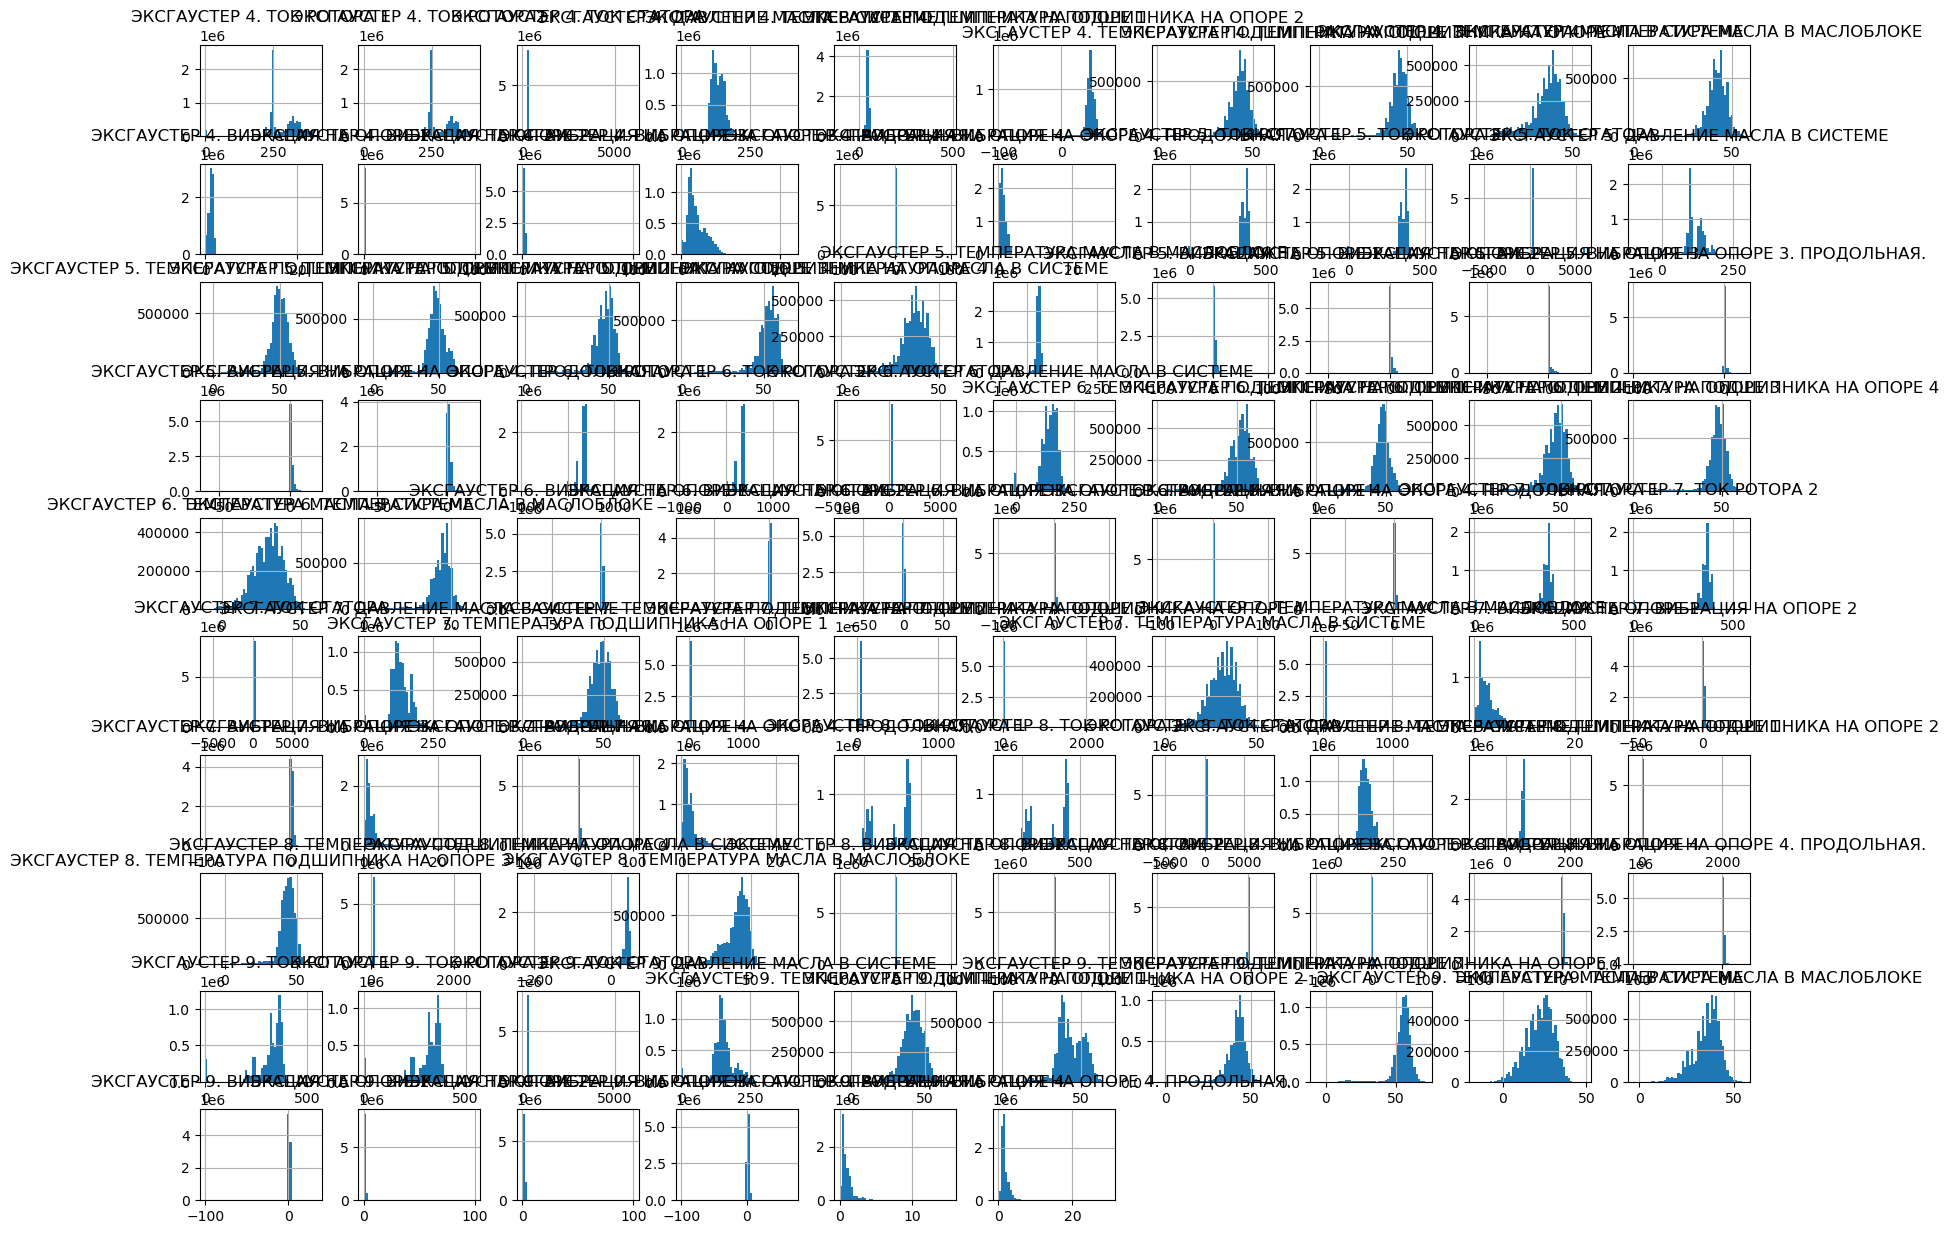

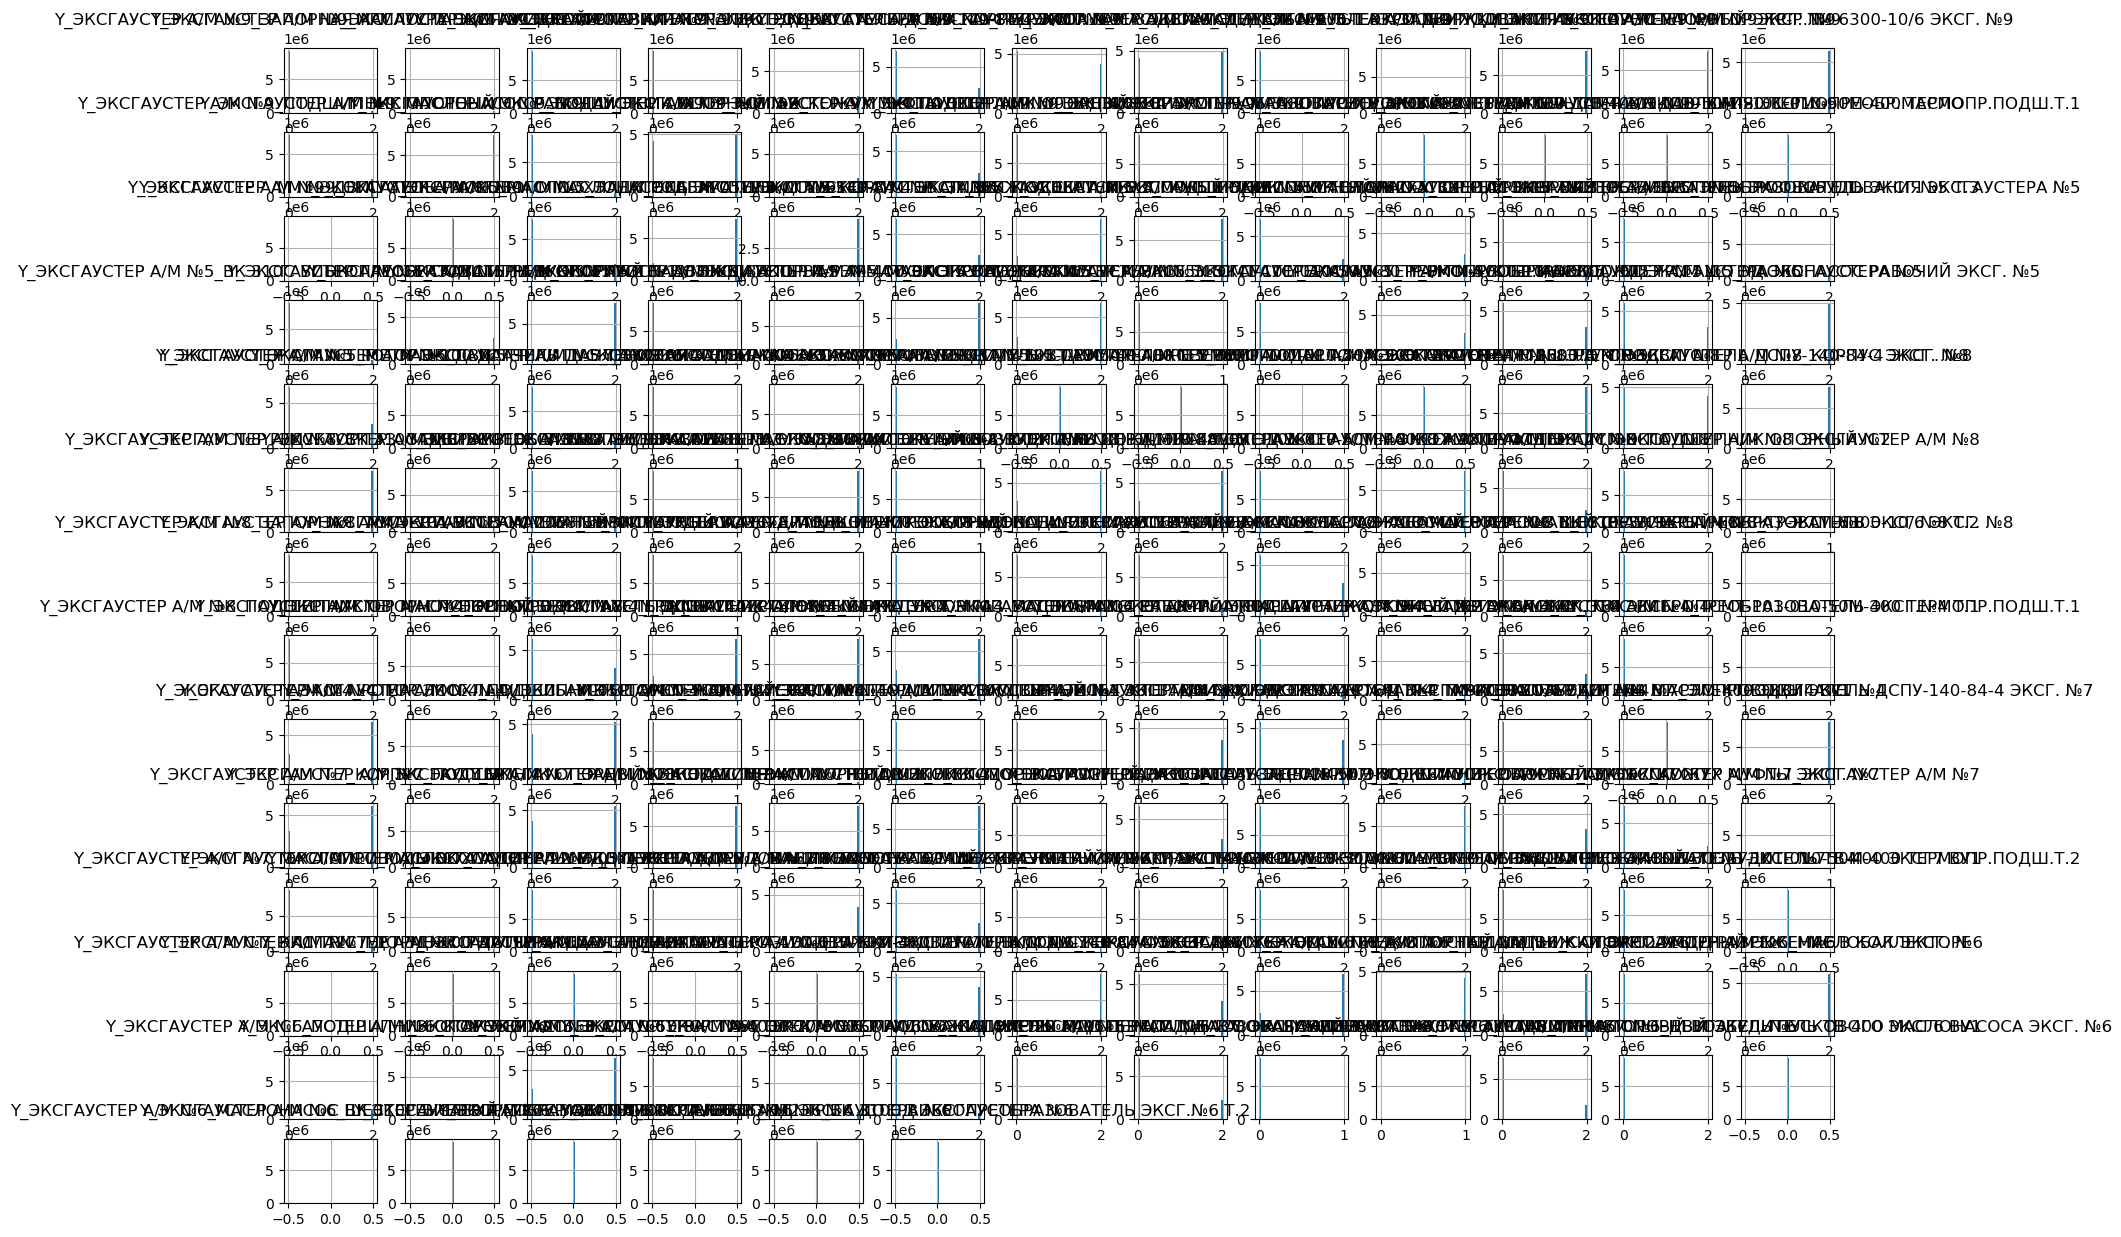

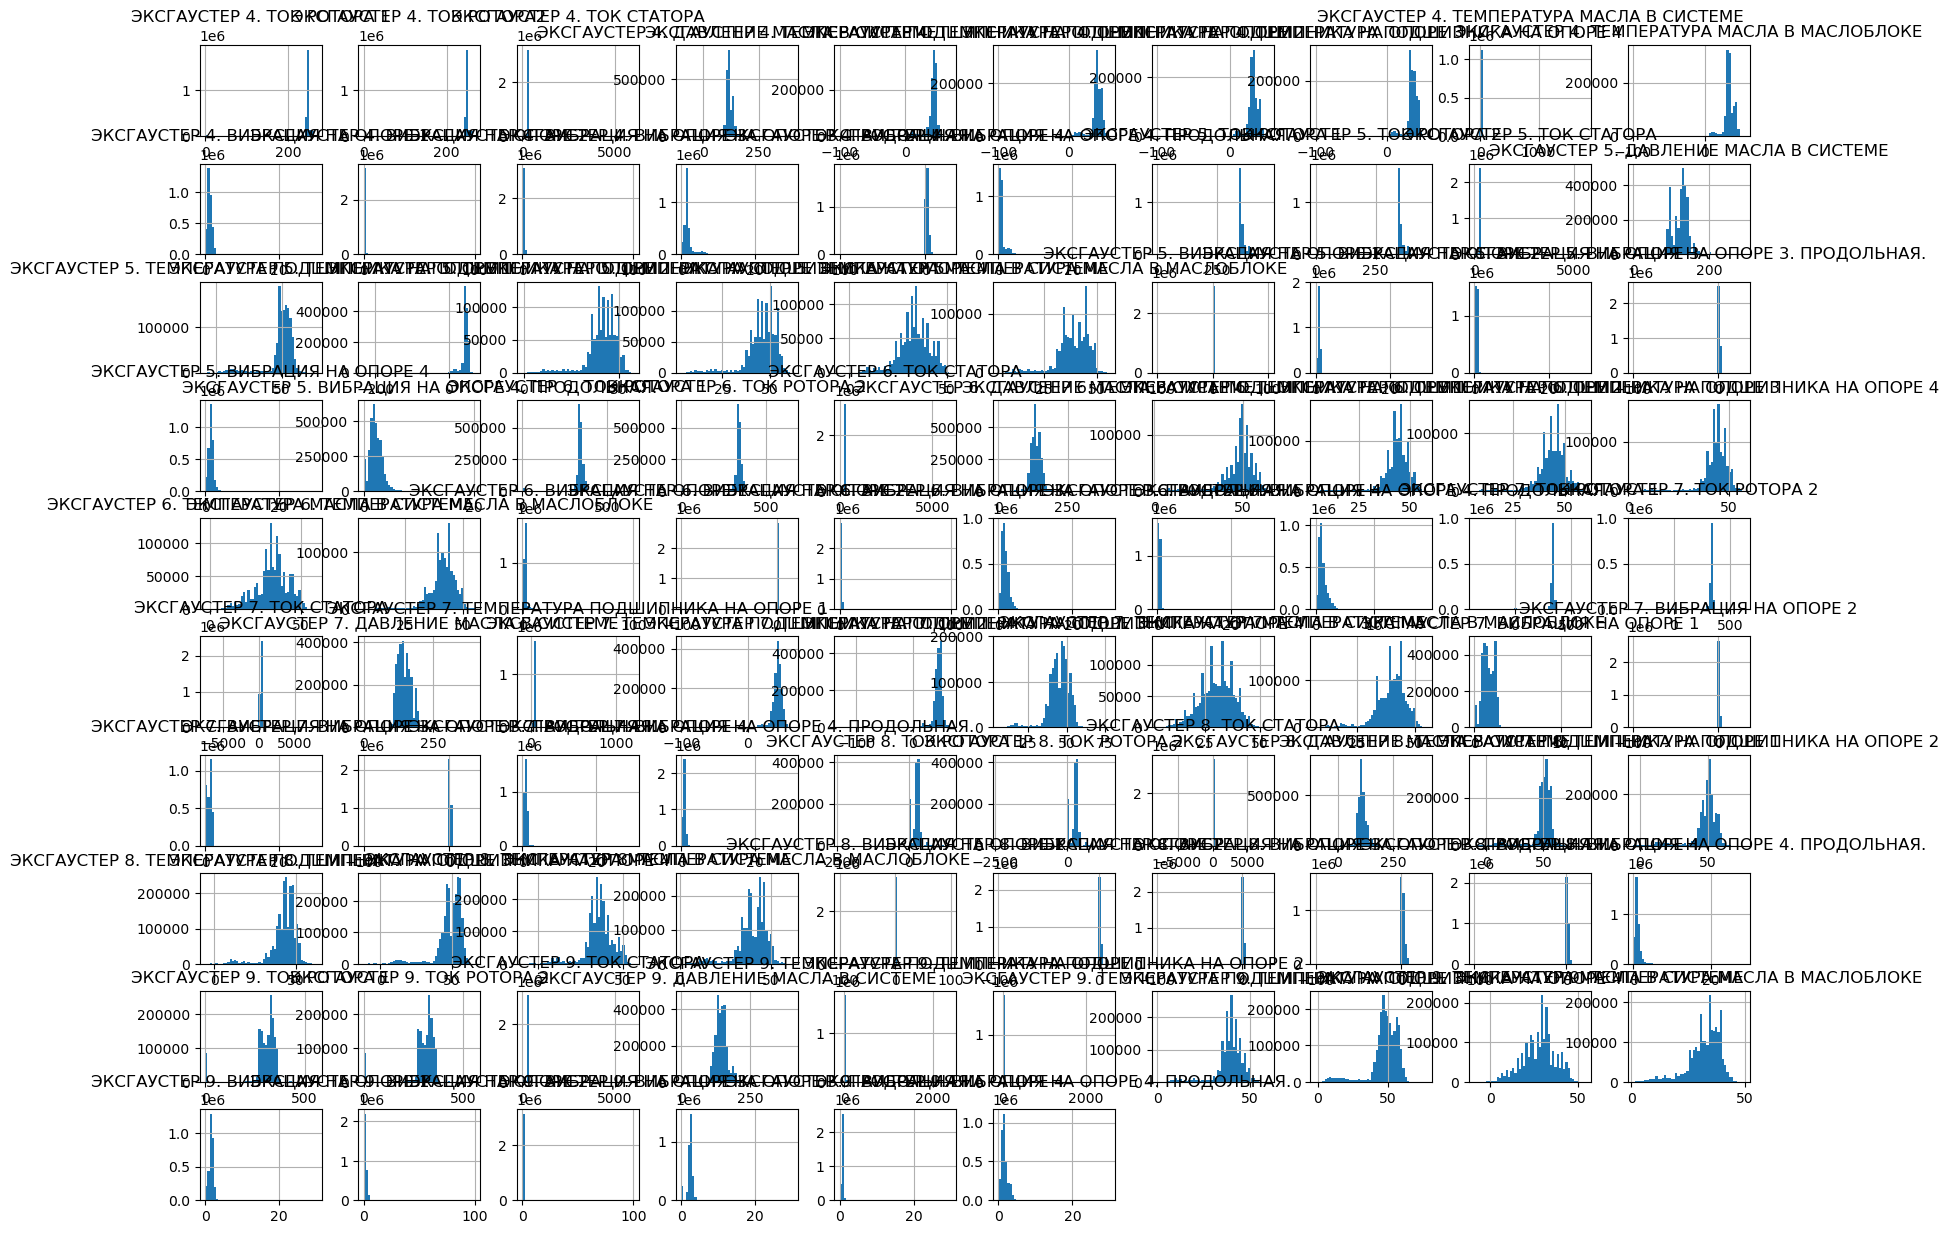

In [6]:
X_train.hist(bins=50, figsize=(20,15))
plt.show()
y_train.hist(bins=50, figsize=(20,15))
plt.show()
X_test.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
X_train = X_train.interpolate(method='linear')
X_test = X_test.interpolate(method='linear')

In [8]:
X_train = X_train.fillna(method='ffill')
X_test = X_test.fillna(method='ffill')

In [9]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

Processing ЭКСГАУСТЕР 4. ТОК РОТОРА 1


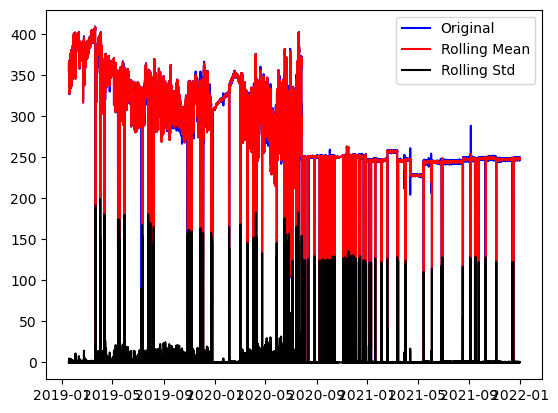

Results of Dickey-Fuller Test:


MemoryError: Unable to allocate 14.7 GiB for an array with shape (9335243, 211) and data type float64

In [13]:
for column in X_train.columns:
    print(f"Processing {column}")
    test_stationarity(X_train[column])

    X_train[f'{column}_diff'] = X_train[column] - X_train[column].shift(1)
    test_stationarity(X_train[f'{column}_diff'].dropna())

    X_train[f'{column}_log'] = np.log(X_train[column])
    test_stationarity(X_train[f'{column}_log'])

    X_train[f'{column}_log_diff'] = X_train[f'{column}_log'] - X_train[f'{column}_log'].shift(1)
    test_stationarity(X_train[f'{column}_log_diff'].dropna())

In [12]:
def test_stationarity(timeseries):

    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(X_train['column_name'])

X_train['column_name_diff'] = X_train['column_name'] - X_train['column_name'].shift(1)
test_stationarity(X_train['column_name_diff'].dropna())

X_train['column_name_log'] = np.log(X_train['column_name'])
test_stationarity(X_train['column_name_log'])

X_train['column_name_log_diff'] = X_train['column_name_log'] - X_train['column_name_log'].shift(1)
test_stationarity(X_train['column_name_log_diff'].dropna())

KeyError: 'column_name'

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)